# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [39]:
print(attrition_data.shape)
attrition_data.head()

(1028, 34)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
from sklearn.model_selection import train_test_split , cross_validate ,StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error , confusion_matrix , f1_score , accuracy_score , roc_auc_score , roc_curve

In [0]:
# print(attrition_data.isna().sum())  #checking for NaN values

In [42]:
cols = list(attrition_data)
cols.insert(0, cols.pop(cols.index('Attrition')))
attrition_data = attrition_data.reindex(columns= cols)
attrition_data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


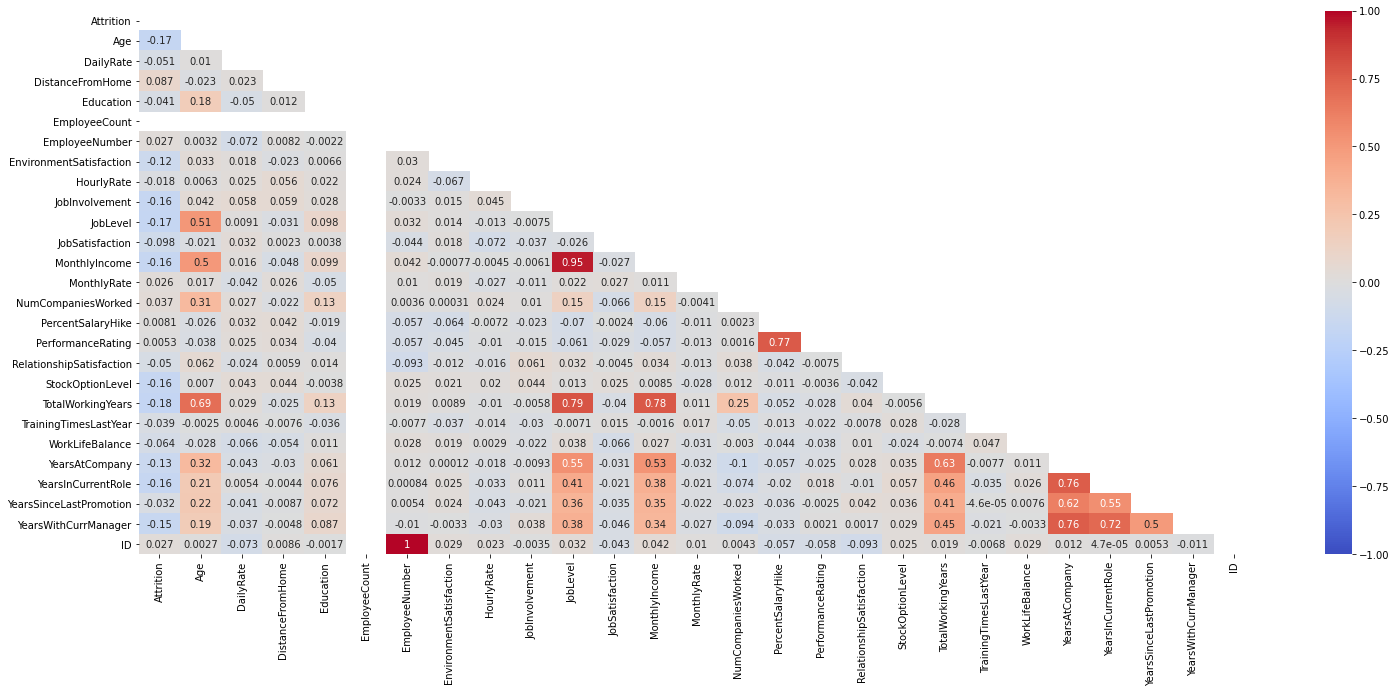

In [43]:
# To find redundant or co-related datas
fig= plt.figure(figsize=(25,10))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(),vmin = -1, cmap='coolwarm', annot=True , mask = mask)

In [44]:
#Employee count is always 1 
#Employee_number &ID are same doesnt convey any information , so they need to be dropped
#Monthly_income and Job_level are also high correlated . So dropping Job_level
#PercentSlaryHike and PerformanceRating correlation value with attrition is way too lo, so they can be dropped
attrition_data.drop(['EmployeeCount', 'EmployeeNumber', 'ID' , 'JobLevel','PercentSalaryHike','PerformanceRating'], axis=1 ,inplace=True)
print(attrition_data.shape)
attrition_data.head()

(1028, 28)


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,4,1,6,3,3,2,2,2,2


In [0]:
#Label Encoding 
lec=LabelEncoder()
text_data=attrition_data.select_dtypes(object)
col=list(text_data.columns) 
for i in col:
  attrition_data[i] = lec.fit_transform(text_data[i])
n=len(attrition_data.columns)

In [0]:
#Feature Scaling
X=attrition_data.iloc[:,1:n+1]
Y=attrition_data.iloc[:,0]
sc_X=StandardScaler()
X = sc_X.fit_transform(X)

In [0]:
#KNN
X1_train, X1_test,Y1_train,Y1_test= train_test_split(X,Y,random_state=1,test_size=0.15)
knnc=KNeighborsClassifier(n_neighbors=13,p=2, metric='euclidean')
knnc.fit(X1_train,Y1_train)
Y1_pred=knnc.predict(X1_test)

Confusion Matrix = [[139   0]
 [ 14   2]]
F1 Score is 0.2222222222222222
Accuracy is 0.9096774193548387
Area under ROC curve is 0.5625


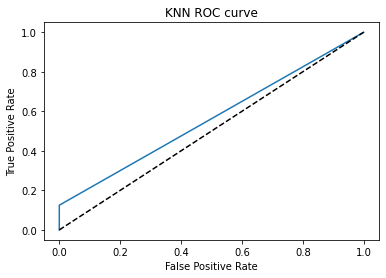

In [48]:
#Testing_KNN
cm=confusion_matrix(Y1_test,Y1_pred)
print("Confusion Matrix = %s"%cm)
print('F1 Score is %s'%f1_score(Y1_test,Y1_pred))
print('Accuracy is %s'%accuracy_score(Y1_test,Y1_pred))
print('Area under ROC curve is %s'%roc_auc_score(Y1_test,Y1_pred))
fpr1,tpr1,threshold= roc_curve(Y1_test, Y1_pred)
plt.plot(fpr1, tpr1)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.show()

In [0]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.15, random_state=1) 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X2_train,Y2_train)
Y2_pred = dtc.predict(X2_test)

Confusion Matrix = [[120  19]
 [  7   9]]
F1 Score is 0.40909090909090917
Accuracy is 0.832258064516129
Area under ROC curve is 0.7129046762589928


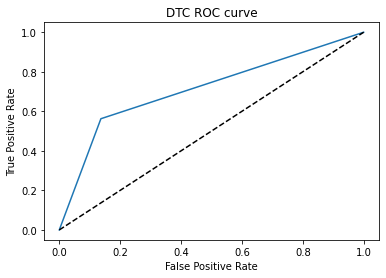

In [50]:
#Testing_Decisiion_Tree
cm2=confusion_matrix(Y2_test,Y2_pred)
print("Confusion Matrix = %s"%cm2)
print('F1 Score is %s'%f1_score(Y2_test,Y2_pred))
print('Accuracy is %s'%accuracy_score(Y2_test,Y2_pred))
print('Area under ROC curve is %s'%roc_auc_score(Y2_test,Y2_pred))
fpr2,tpr2,threshold= roc_curve(Y2_test, Y2_pred)
plt.plot(fpr2, tpr2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC ROC curve')
plt.show()

In [0]:
#Random_Forest_Classifier
rfc=RandomForestClassifier(n_estimators=100)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.15, random_state=1) 
rfc.fit(X3_train,Y3_train)
Y3_pred=rfc.predict(X3_test)

Confusion Matrix = [[135   4]
 [ 14   2]]
F1 Score is 0.18181818181818182
Accuracy is 0.8838709677419355
Area under ROC curve is 0.5481115107913669


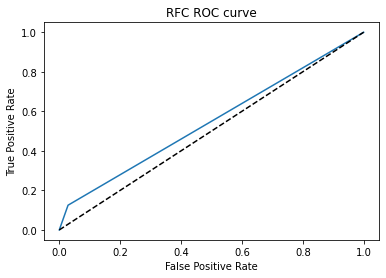

In [53]:
#Testing_RFC
cm3=confusion_matrix(Y3_test,Y3_pred)
print("Confusion Matrix = %s"%cm3)
print('F1 Score is %s'%f1_score(Y3_test,Y3_pred))
print('Accuracy is %s'%accuracy_score(Y3_test,Y3_pred))
print('Area under ROC curve is %s'%roc_auc_score(Y3_test,Y3_pred))
fpr3,tpr3,threshold= roc_curve(Y3_test, Y3_pred)
plt.plot(fpr3, tpr3)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  